In [1]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_svmlight_file 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import defaultdict

## load data 

In [2]:
X_train,y_train= load_svmlight_file('a9a.txt',n_features=123)
X_train = X_train.toarray()

X_vali, y_vali = load_svmlight_file('a9atest.txt',n_features=123)
X_vali = X_vali.toarray()

n_train, n_feature = X_train.shape
n_vali, _ = X_vali.shape 




In [3]:
# process data
X_train = np.concatenate((X_train,np.ones((n_train,1))),axis =1)
y_train = np.reshape(y_train,(n_train,1))

X_vali = np.concatenate((X_vali, np.ones((n_vali,1))),axis=1)
y_vali = np.reshape(y_vali,(n_vali,1))

record_list = defaultdict(list)

#parameters
epoch = 500
lr_rate =0.0001

In [4]:
class LogisticRegreesionClassfier:
    
    def fit(self,X, y, X_vali, y_vali,optimizer):
        global record_list
        W =np.random.random(size=(n_feature+1, 1)) 
        C = 0.5
        batch_size = 5000
    
        for _ in range(epoch):
             # generate random indexex for each epoch            
            indexes = np.random.randint(0, n_train, size=batch_size)
        
            #calcualte train loss
            y_hat = 1 / (1 + np.exp(-np.dot(X, W)))
            loss_train = -np.average(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
            
            record_list[optimizer].append(loss_train)
            
            if optimizer ==0: # SGD 
                result=1- y[indexes]*np.dot(X[indexes], W )
                gW =np.where( result>=0 ,-y[indexes],0)
                gradient = W + C*np.dot(X[indexes].transpose(),gW)
                W = W +0.0001*(-gradient)
                
            elif optimizer ==1:#NAG
                momentum =0.5
                
                result=1- y[indexes]*np.dot(X[indexes], W )
                gW =np.where( result>=0 ,-y[indexes],0)
                gradient = W + C*np.dot(X[indexes].transpose(),gW)
                if _ == 0:
                    v = np.zeros_like(gradient)
                v = momentum* v + lr_rate * gradient
                W = W - v
                
                
            elif optimizer ==2: #RMSProp 
                weight_decay = 0.9
                epsilon=1e-8
                result=1- y[indexes]*np.dot(X[indexes], W )
                gW =np.where( result>=0 ,-y[indexes],0)
                gradient = W + C*np.dot(X[indexes].transpose(),gW)
                
                if _ == 0:
                    g =  np.zeros_like(gradient)
                    
                    
                g= weight_decay*g +(1-weight_decay)*(gradient*gradient) 
                W = W -0.006/np.sqrt(g+epsilon)*gradient
                          
            
            elif optimizer == 3 :#AdaDelta 
                gamma = 0.9
                epsilon = 1e-5
                result=1- y[indexes]*np.dot(X[indexes], W )
                gW =np.where( result>=0 ,-y[indexes],0)
                gradient = W + C*np.dot(X[indexes].transpose(),gW)
                
                if _ == 0:
                    g =  np.zeros_like(gradient)
                    delta_theta = np.zeros_like(gradient)
                    
                g = gamma * g +(1-gamma) * gradient
                delta_theta =-(0.0005/np.sqrt(g + epsilon)) *gradient
                W = W + delta_theta
                
                          
            elif optimizer == 4: # Adam
                epsilon =1e-8
                eta = 0.1
                beta1 =0.9
                beta2 = 0.999
                
                result=1- y[indexes]*np.dot(X[indexes], W )
                gW =np.where( result>=0 ,-y[indexes],0)
                gradient = W + C*np.dot(X[indexes].transpose(),gW)
                
                if _ == 0:
                    m =  np.zeros_like(gradient)
                    G = np.zeros_like(gradient)
                m = beta1 * m +(1 - beta1) *gradient
                G = beta2 * G +(1 - beta2) * gradient*gradient
                W = W - 0.001 * m/(np.sqrt(G)+epsilon)
    
    

In [5]:
logreg = LogisticRegreesionClassfier()

for n in range(5):
    logreg.fit(X_train,y_train,X_vali,y_vali,n)

/home/vanke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in sqrt
/home/vanke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater_equal


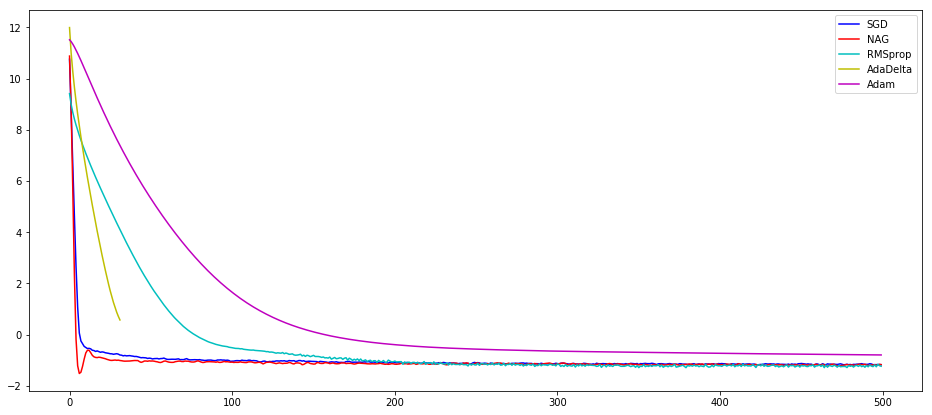

In [6]:
epoches = np.arange(0,epoch)
plt.figure(figsize=(16,7))
for n in range(5):
    if n ==0:
        label = "SGD"
        plt.plot(epoches,record_list[n],"-",color='b', label= label)
    elif n ==1:
        label = "NAG"
        plt.plot(epoches,record_list[n],"-",color='r', label= label)
    elif n ==2:
        label = "RMSprop"
        plt.plot(epoches,record_list[n],"-",color='c', label=label )
    elif n ==3:
        label = "AdaDelta"
        plt.plot(epoches,record_list[n],"-",color='y', label= label)
    elif n ==4:
        label = "Adam"
        plt.plot(epoches,record_list[n],"-",color='m', label= label)

plt.legend(loc='best')
plt.show()